#**Decision Tree**

**Decision Tree :**
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

***Construction of Decision Tree :***

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.

***Decision Tree Representation :***

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree,testing the attribute specified by this node,then moving down the tree branch corresponding to the value of the attribute as shown in the above figure.This process is then repeated for the subtree rooted at the new node.

####***Strengths and Weakness of Decision Tree approach***

***The strengths of decision tree methods are:***
* Decision trees are able to generate understandable rules.
* Decision trees perform classification without requiring much computation.
* Decision trees are able to handle both continuous and categorical variables.
* Decision trees provide a clear indication of which fields are most important for prediction or classification.

***The weaknesses of decision tree methods :***

* Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
* Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.
* Decision tree can be computationally expensive to train. 
* The process of growing a decision tree is computationally expensive. 
* At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. 
* Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.

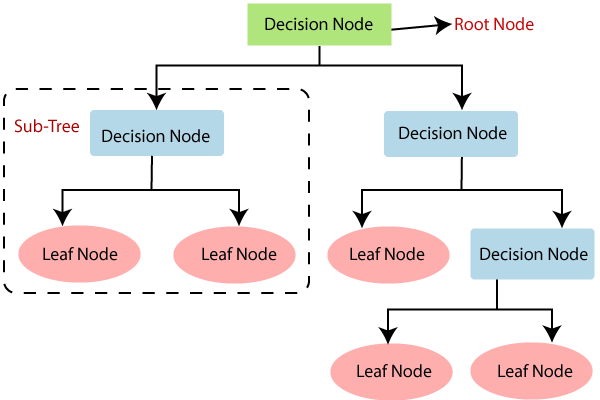

***Further Reading***

https://e2eml.school/how_decision_trees_work.html

##**Splitting**

As in all algorithms, the cost function is the basis of the algorithm. In the case of decision trees, there are two main cost functions: the Gini index and entropy.

Any of the cost functions we can use are based on measuring impurity. Impurity refers to the fact that, when we make a cut, how likely is it that the target variable will be classified incorrectly.

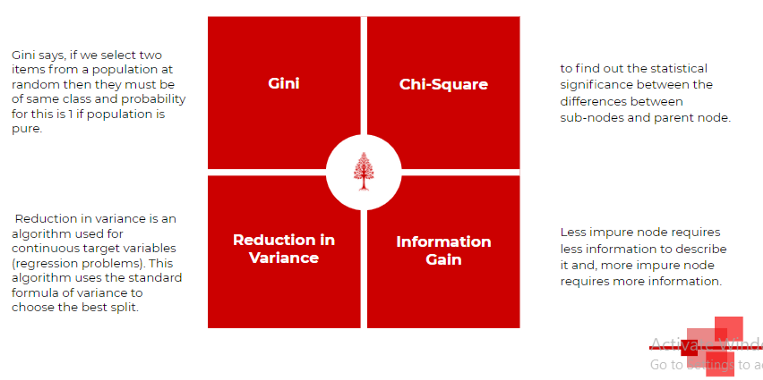

As we have seen, cuts are compared by impurity. Therefore, we are interested in comparing those cuts that generate less impurity. For this, Information Gain is used. This metric indicates the improvement when making different partitions and is usually used with entropy (it could also be used with the Gini index, although in that case it would not be called Informaiton Gain).

###***1-Entropy***
Entropy can be defined as a measure of the purity of the sub split. Entropy always lies between 0 to 1. The entropy of any split can be calculated by this formula.

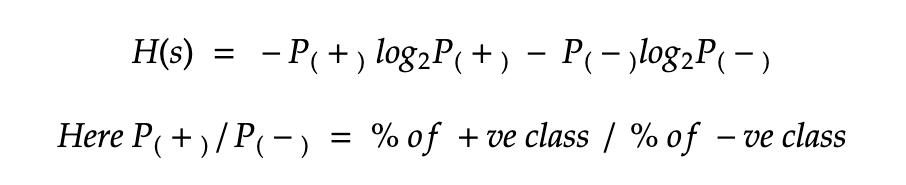

The algorithm calculates the entropy of each feature after every split and as the splitting continues on, it selects the best feature and starts splitting according to it. For a detailed calculation of entropy with an example, you can refer to this article.



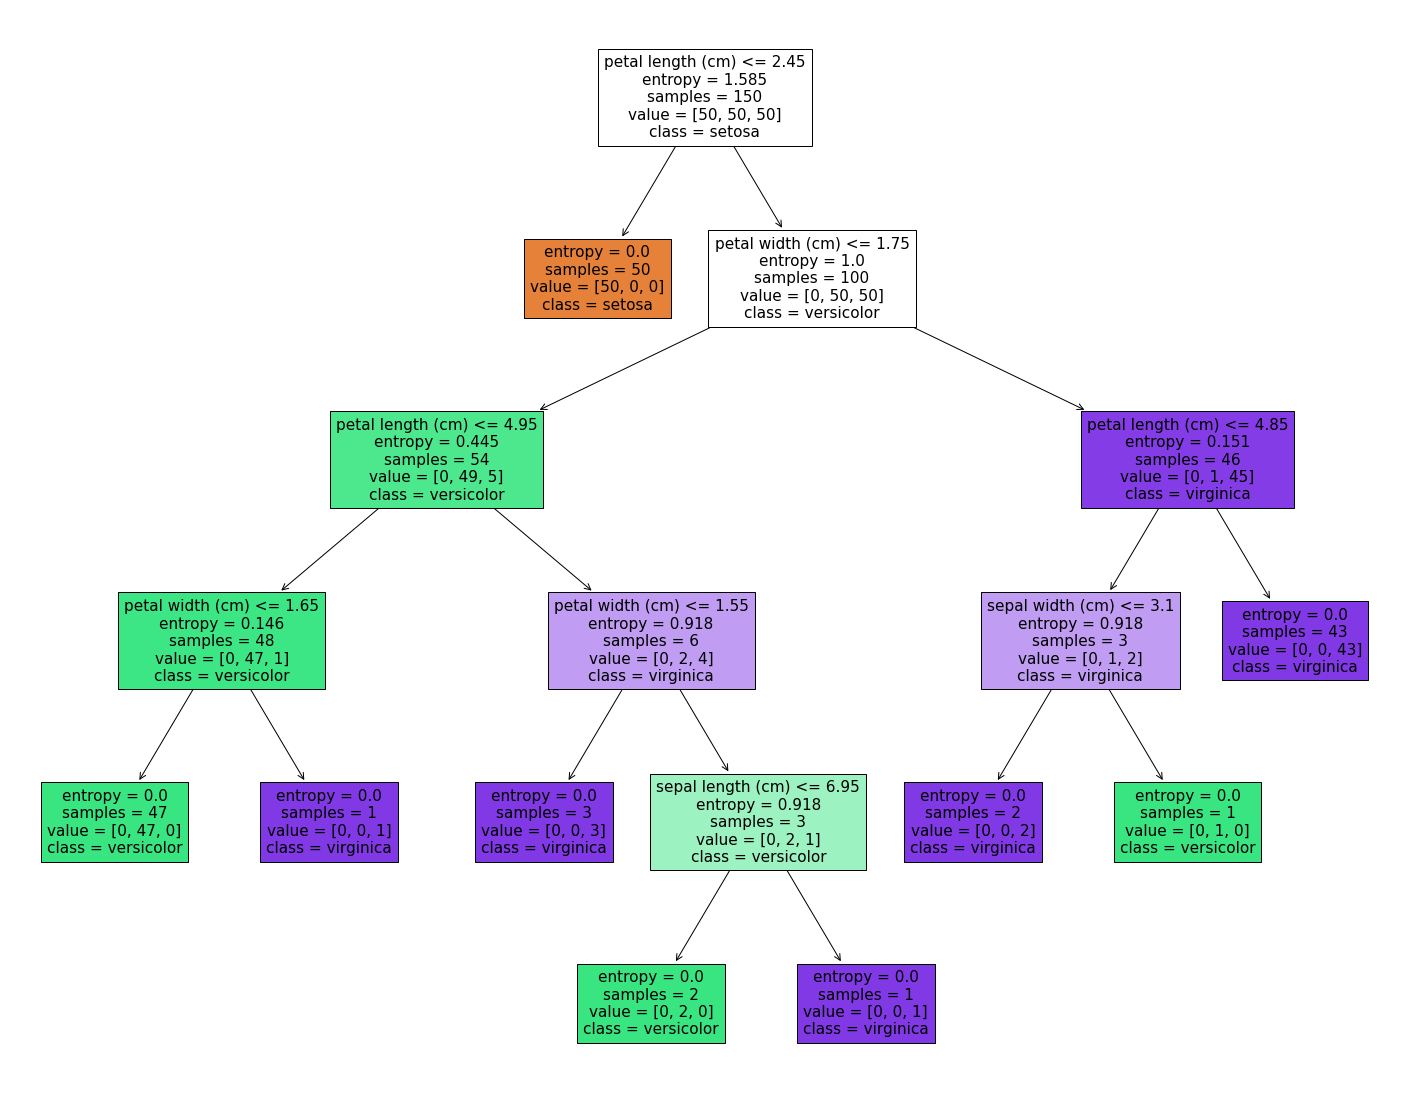

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(criterion="entropy", random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

###***2-Gini Impurity***

The internal working of Gini impurity is also somewhat similar to the working of entropy in the Decision Tree. In the Decision Tree algorithm, both are used for building the tree by splitting as per the appropriate features but there is quite a difference in the computation of both the methods. Gini Impurity of features after splitting can be calculated by using this formula.


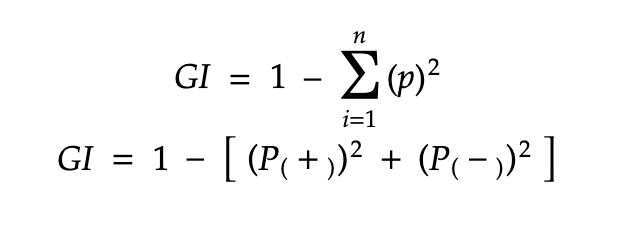

***Entropy v/s Gini Impurity:***

The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.



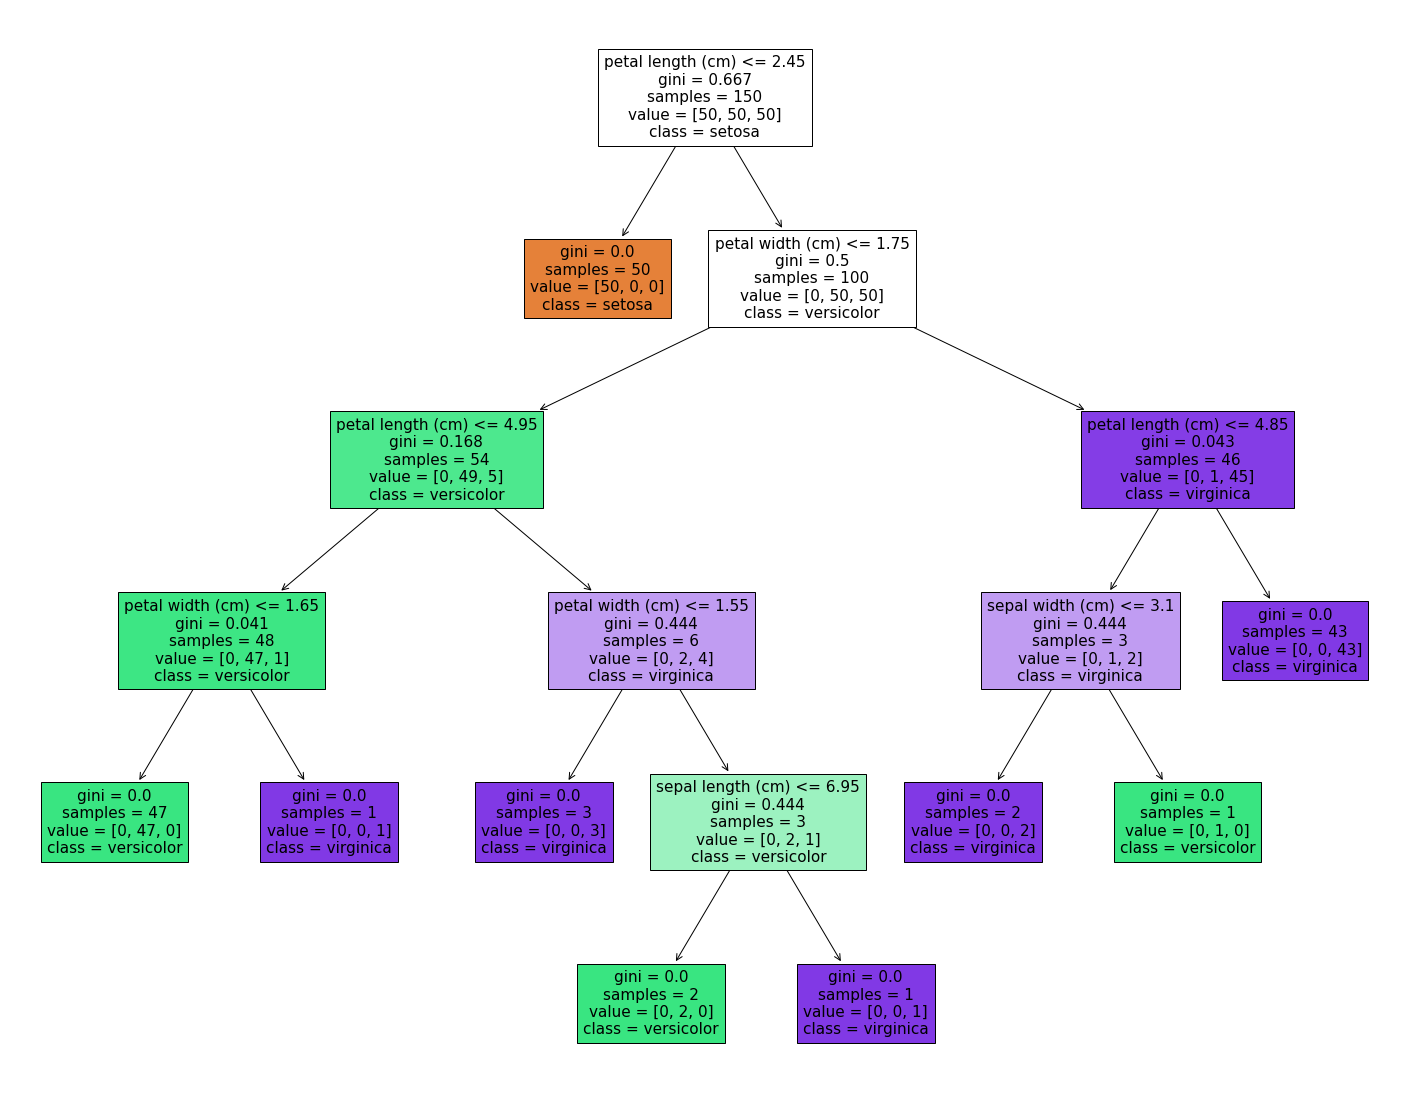

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

###***3-Information Gain***
 
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

Information gain is a decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

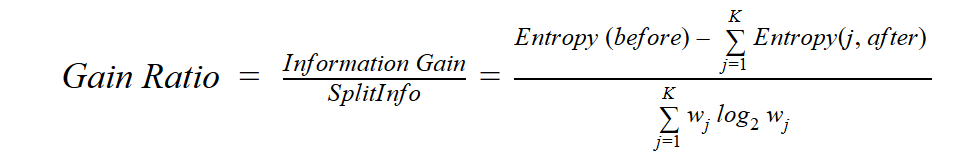
 

##**Using Numpy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d heptapod/titanic

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 2.60MB/s]
Archive:  titanic.zip
replace train_and_test2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_and_test2.csv     


In [ ]:
data=pd.read_csv('train_and_test2.csv')
data

Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
0          0  ...        0        0        0       3        0        0   
1          0  ...        0        0        0       1        0        0   
2          0  ...        0        0        0       3        0        0   
3          0  ...        0        0        0       1        0        0   
4          0  ...        0        0        0       3        0        0   
...      ...  ...      ...      ...      ...     ...      ...      ...   
1304       0  ...        0        0        0       3        0        0   
1305       0  ...        0        0        0       1        0        0   
1306       0  ...        0        0        0       3        0        0   
1307       0  ...        0        0        0       3        0        0   
1308       0  ...        0        0        0       3        0        0   

      Embarked  zero.17  zero.18  2urvived  
0          2.0        0        0         0  
1          0.0        0        0         1  
2          2.0        0        0         1  
3          2.0        0        0         1  
4          2.0        0        0         0  
...        ...      ...      ...       ...  
1304       2.0        0        0         0  
1305       0.0        0        0         0  
1306       2.0        0        0         0  
1307       2.0        0        0         0  
1308       0.0        0        0         0  

[1309 rows x 28 columns]

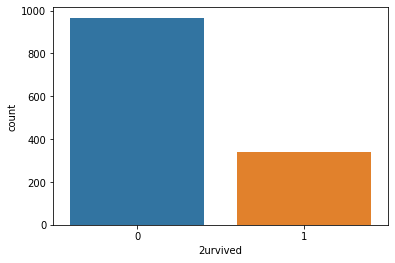

In [ ]:
# Countplot
sns.countplot(x=data['2urvived'], data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


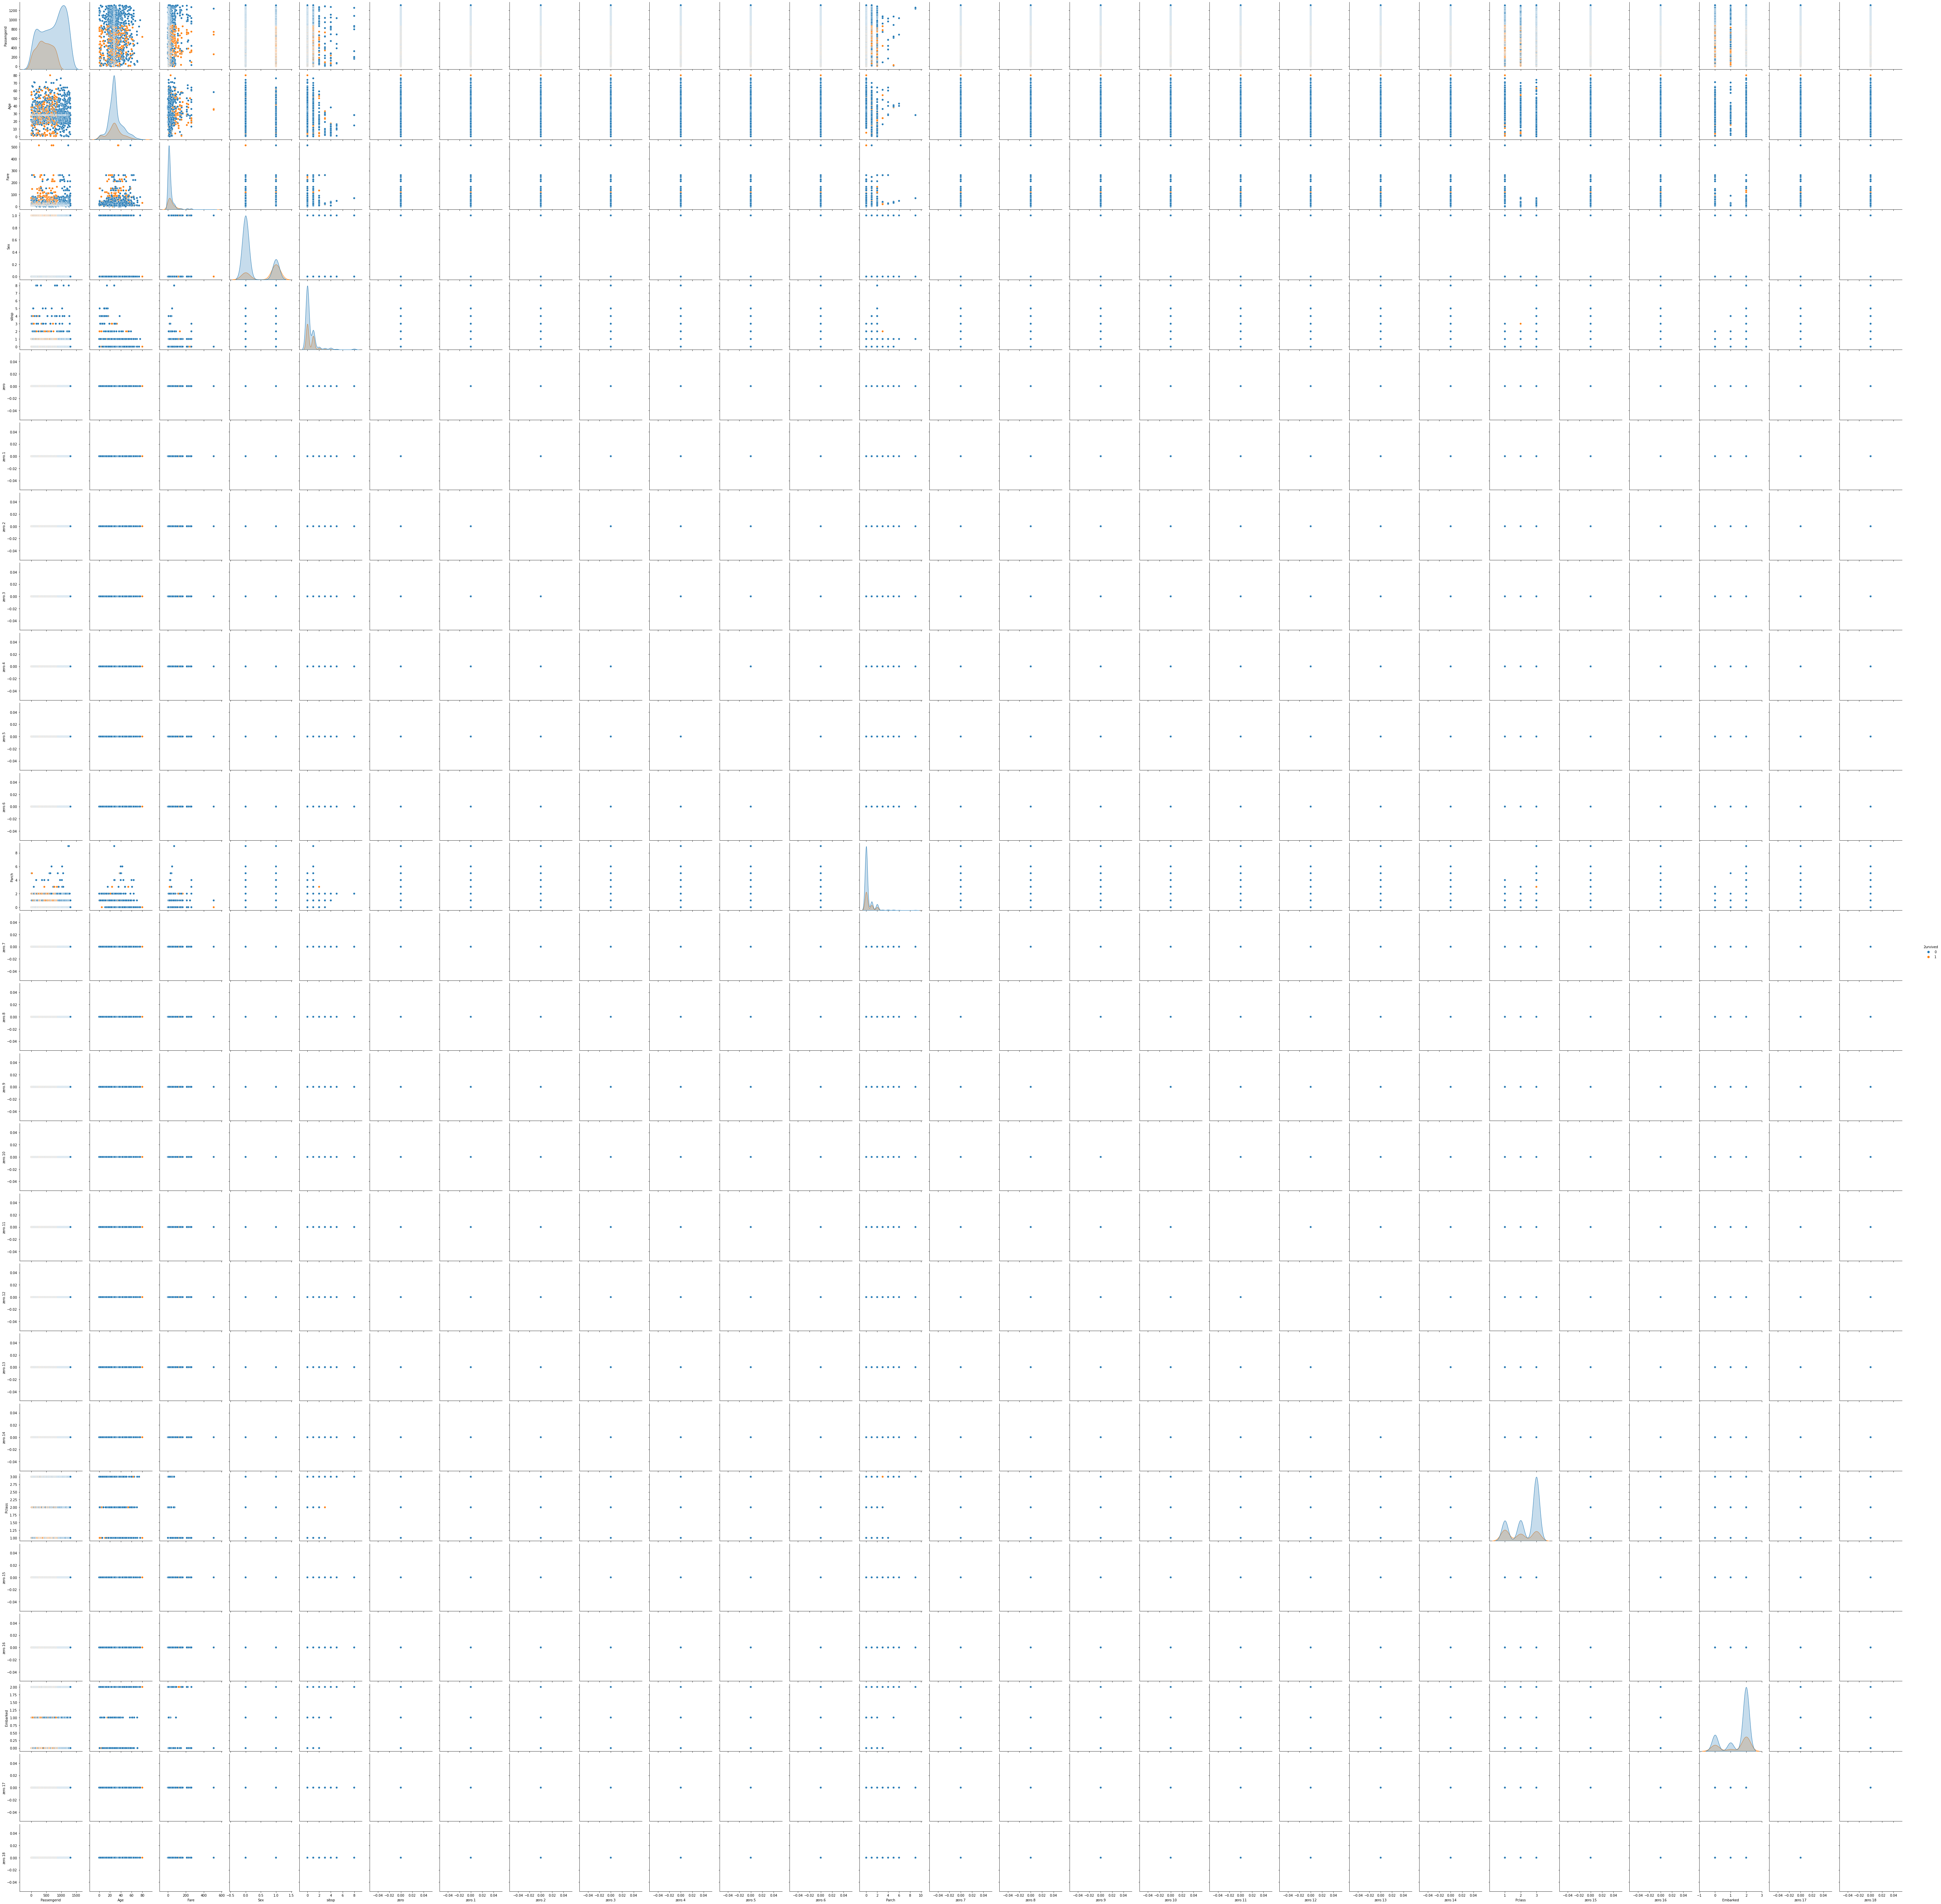

In [ ]:
# Plot PAIRPLOT
sns.pairplot(data,hue="2urvived",diag_kind="kde", size =3)

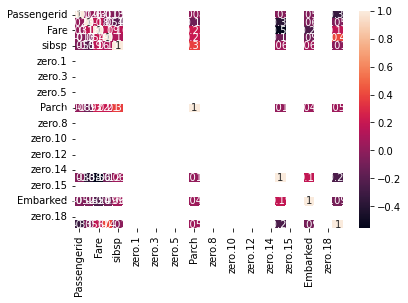

In [ ]:
# Plot HEATMAP
sns.heatmap(data.corr(),annot=True)

In [ ]:
x=data.drop(['2urvived','Passengerid'],axis=1)
y=data['2urvived']
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1309, dtype: int64

The basic idea of decision trees is choosing particular values of particular features to split the data best(gain-ratio) and by this repeated process of splitting we keep refining the data until all we have got is simmilar type of labels in the branch or there are no features left to split upon . So the basic idea rests upon asking the right questions.

**So we will start upon with making a questions class which upon
given proper params. will frame the question for us(which will help us while printing the tree too)**

In [ ]:
class Question:
    # initialise column and value variables->
    # eg->if ques is ->is sepal_length>=1cm then
    def __init__(self,column,value):
        self.column=column
        self.value=value
    
    # it matches whether the given data is in accordance with the value set, returns true and false accordingly
    def match(self,data):
        value=data[self.column]
        return value>=self.value
    
    # This is just a helper method to print
    # the question in a readable format.
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))
        
    # Spliting the Data based on the respective ques.
    def partition(data,question):
      import re
      #intialise two seprate lists 
      true_row,false_row=[],[]
      for row in data.iterrows():
        # traverse on each datapoint match the given datapoint with the respective question 
        if question.match(row):
          # if question.match returns True append the given row in true row list
          true_row.append(row)
        else:
          false_row.append(row)
        return true_row,false_row

Question.partition(data,Question(0,5))

([], [(0, Passengerid     1.00
   Age            22.00
   Fare            7.25
   Sex             0.00
   sibsp           1.00
   zero            0.00
   zero.1          0.00
   zero.2          0.00
   zero.3          0.00
   zero.4          0.00
   zero.5          0.00
   zero.6          0.00
   Parch           0.00
   zero.7          0.00
   zero.8          0.00
   zero.9          0.00
   zero.10         0.00
   zero.11         0.00
   zero.12         0.00
   zero.13         0.00
   zero.14         0.00
   Pclass          3.00
   zero.15         0.00
   zero.16         0.00
   Embarked        2.00
   zero.17         0.00
   zero.18         0.00
   2urvived        0.00
   Name: 0, dtype: float64)])

In [ ]:
#count the unique values of labels and store them in a dictionary
def count_values(data):
    #will return a dictionary with species values as key and frequency as values
    count={}
    
    #takes whole dataset in as argument
    for row in data:
        
        #traverse on each datapoint
        label=row[-1]
        #labels are in the last column
        #if label is not even once come initialise it
        if label not in count:
            count[label]=0
        #increase the count of present label by 1
        count[label]+=1
    return count

count_values(y)

TypeError: ignored

In [ ]:
# Spliting the Data based on the Question
def partition(data,question):
  import re
  #intialise two seprate lists 
  true_row,false_row=[],[]
  for row in data.iterrows():
    # traverse on each datapoint match the given datapoint with the respective question 
    if question.match(row):
      # if question.match returns True append the given row in true row list
      true_row.append(row)
    else:
      false_row.append(row)
    return f'True Rows : {true_row}, False Rows : {false_row}'

partition(data,Question(0,28))

'True Rows : [], False Rows : [(0, Passengerid     1.00\nAge            22.00\nFare            7.25\nSex             0.00\nsibsp           1.00\nzero            0.00\nzero.1          0.00\nzero.2          0.00\nzero.3          0.00\nzero.4          0.00\nzero.5          0.00\nzero.6          0.00\nParch           0.00\nzero.7          0.00\nzero.8          0.00\nzero.9          0.00\nzero.10         0.00\nzero.11         0.00\nzero.12         0.00\nzero.13         0.00\nzero.14         0.00\nPclass          3.00\nzero.15         0.00\nzero.16         0.00\nEmbarked        2.00\nzero.17         0.00\nzero.18         0.00\n2urvived        0.00\nName: 0, dtype: float64)]'

now we need some method by which we can quantify this right question we are talking about.For this we use various methods like->

**GINI Impurity**

In [ ]:
# GINI IMPURITY is defined as a measure of misclassification. For eg if the data is pure(1 class only)then gini impurity=0
def gini(rows):
    #stores dictionary of frequency of labels
    count=count_values(rows)
    #initialise impurity as 1
    impurity=1
    for label in count:
        #probablity of a unique label
        probab_of_label=count[label]/float(len(rows))
        #calculation gini impurity acc to formula
        impurity-=probab_of_label**2
    return impurity

gini(data)

0.9999696524210073

Entropy is the sum of -p(x)log(p(x)) across all the diffrent possible results

In [ ]:
# Entropy is basically a measure of chaos-randomness
def entropy(rows):
    #initialise entropy
    entropy=0
    from math import log
    #calculating log(x) in base 2
    log2=lambda x:log(x)/log(2)
    count=count_values(rows)
    #storing and traversing the dictionary
    for label in count:
        #probablity of each unique label
        p=count[label]/float(len(rows))
        #calculating entropy
        entropy-=p*log2(p)
    return entropy

entropy(data)

0.20409785728976565

Information Gain is basically the method in which we quantify by spliting upon this feature how much information have we gained

In [ ]:
# Weighted Info Gain - Gini
def info_gain_gini(current,left,right):
    #porbab of one branch
    p =float(len(left))/len(left)+len(right)
    #formula for info gian
    return current-p*gini(left)-(1-p)*gini(right)

# Weighted Info Gain - Entropy
def info_gain_entropy(current,left,right):
    p =float(len(left))/len(left)+len(right)
    return current-p*entropy(left)-(1-p)*entropy(right)

**Best Split**

This is one of the most important function  as it lets us decide given the current data what is the best feature and feature value to split upon

In [ ]:
def best_split(rows):
    #initialise best gain and best question
    best_gain=0
    best_question=None

    #calculate the current_gain
    current=gini(rows)
    
    # #total number of features
    # features=len(rows.columns)-1
    for col in rows.columns:
        
        #collects all unique classes for a feature
        values=[rows[col] for row in rows.iterrows()]
        for val in rows.iterrows():
            
            #traverse each unique class & ask the corresponding question
            question=Question(col,val)
            
            #divide the data based on that ques
            true_rows,false_rows=partition(rows,Question(col,val))
            if len(true_rows)==0 or len(false_rows) ==0:
                #no use go to next iteration
                continue
            
            #calculate corresponding gain
            gain=info_gain_gini(current,true_rows,false_rows)
            
            #if gain is > than the best replace
            if gain>=best_gain:
                best_gain,best_question=gain,question
            
            #iterate through each unique class of each feature and return the best gain and best question     
    return best_gain,best_question

a,b=best_split(data)
print(b)
print(a)

TypeError: ignored

We are done with our utility functions and classes now we will move on to major classes to actually build and print the tree

In [ ]:
# DECISION NODE
class DecisionNode:
    def __init__(self,question,true_branch,false_branch):
        #question object stores col and val variables regarding the question of that node
        self.question = question
        #this stores the branch that is true
        self.true_branch = true_branch
        #this stores the false branch
        self.false_branch = false_branch

In [ ]:
# Leaf class is the one whichstores leaf of trees these are special Leaf Nodes -> on reaching them eitherN100% purity is achieved or no features are left to split upon
class Leaf:
    def __init__(self,rows):
        #stores unique labels and their values in predictio
        self.predictions=count_values(rows)

**Build TREE function recurssively builds the tree**

In [ ]:
def build_tree(rows):
    #takes the whole dataset as argument gets the best gain and best question
    gain,question=best_split(rows)
    
    #if gian=0 i.e. leaf conditions are satisfied
    if gain==0:
        
        #make a leaf object and return
        return Leaf(rows)
    
    # If we reach here, we have found a useful feature / value to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    #returns the root question node storing branches as well as the quesiton
    return DecisionNode(question, true_branch, false_branch)

    #building the tree
    tree=build_tree(data)

In [ ]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION",node.predictions)
        return 
    #print the question at node
    print(indentation + str(node.question))
    
    #call the function on true branch 
    print(indentation+ "True Branch")
    print_tree(node.true_branch,indentation + " ")
    
    #on flase branch
    print(indentation+ "False Branch")
    print_tree(node.false_branch,indentation + " ")

    print_tree(tree)

##**Using SkLearn**

###**1-Binary**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
A
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d heptapod/titanic

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 2.36MB/s]
Archive:  titanic.zip
replace train_and_test2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_and_test2.csv     


In [ ]:
data=pd.read_csv('train_and_test2.csv')
data

Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
0          0  ...        0        0        0       3        0        0   
1          0  ...        0        0        0       1        0        0   
2          0  ...        0        0        0       3        0        0   
3          0  ...        0        0        0       1        0        0   
4          0  ...        0        0        0       3        0        0   
...      ...  ...      ...      ...      ...     ...      ...      ...   
1304       0  ...        0        0        0       3        0        0   
1305       0  ...        0        0        0       1        0        0   
1306       0  ...        0        0        0       3        0        0   
1307       0  ...        0        0        0       3        0        0   
1308       0  ...        0        0        0       3        0        0   

      Embarked  zero.17  zero.18  2urvived  
0          2.0        0        0         0  
1          0.0        0        0         1  
2          2.0        0        0         1  
3          2.0        0        0         1  
4          2.0        0        0         0  
...        ...      ...      ...       ...  
1304       2.0        0        0         0  
1305       0.0        0        0         0  
1306       2.0        0        0         0  
1307       2.0        0        0         0  
1308       0.0        0        0         0  

[1309 rows x 28 columns]

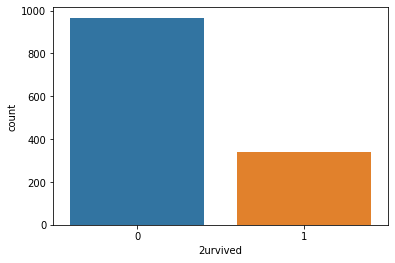

In [ ]:
# Countplot
sns.countplot(x=data['2urvived'], data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


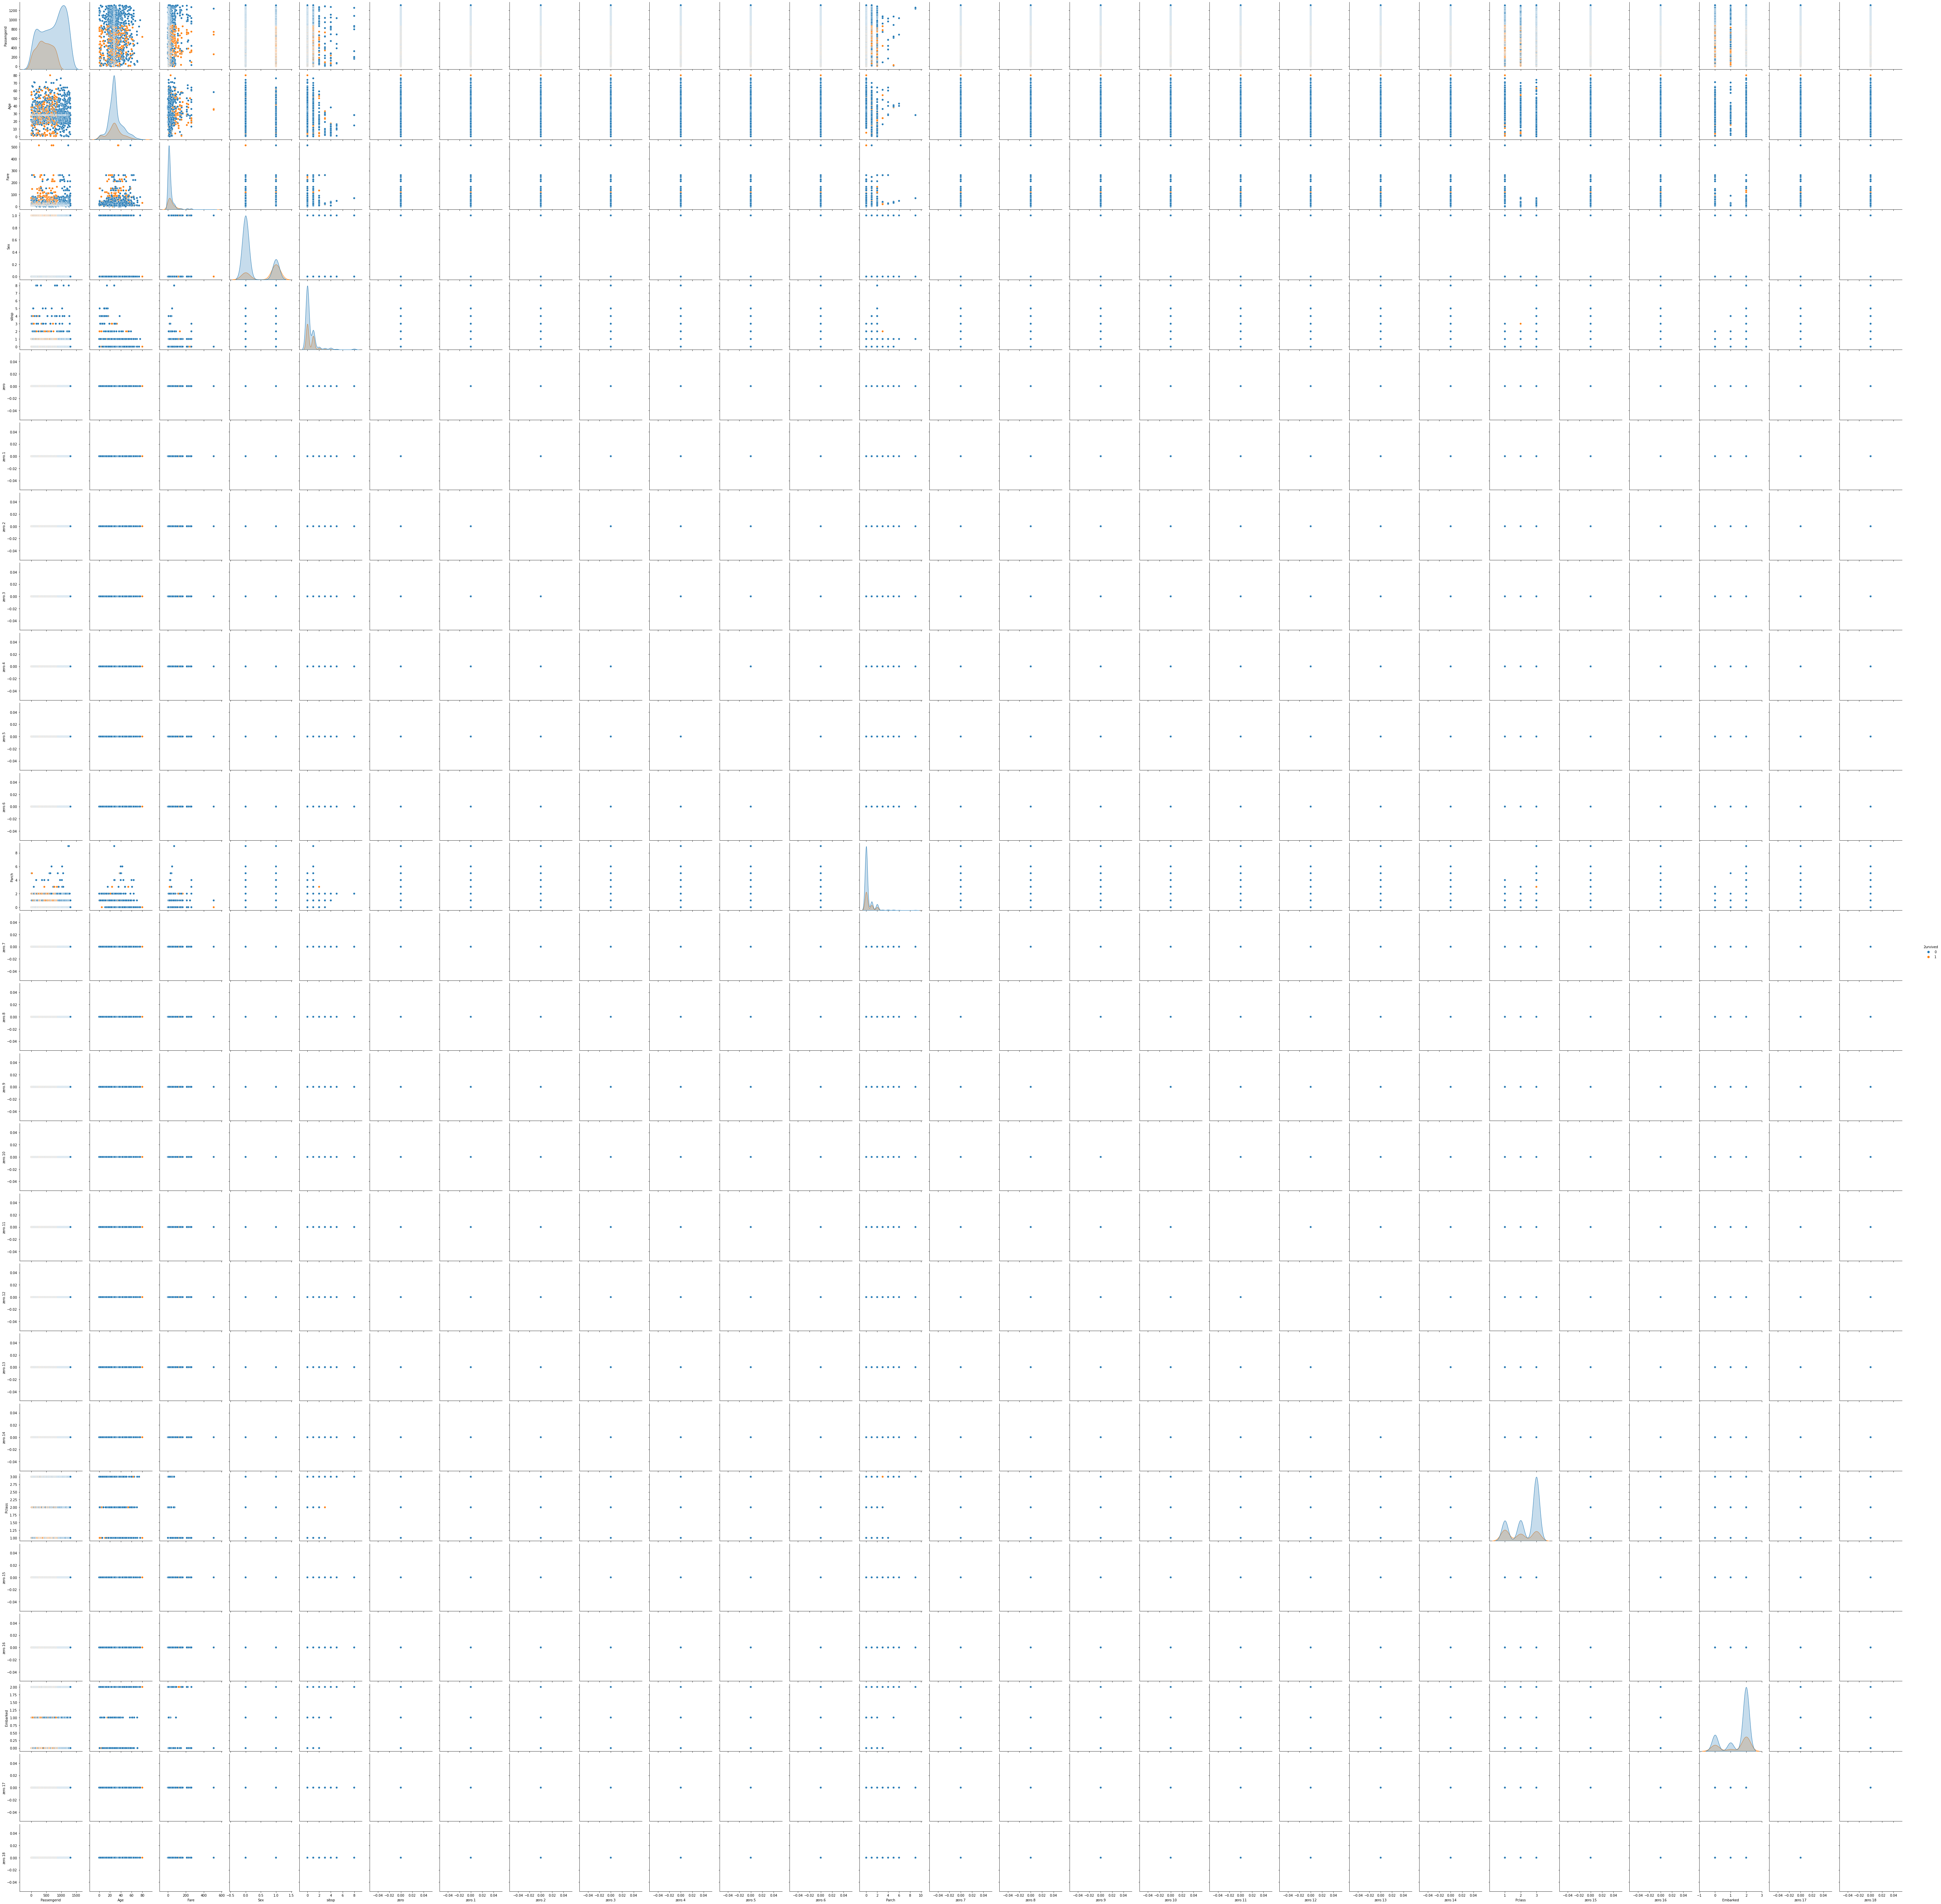

In [ ]:
# Plot PAIRPLOT
sns.pairplot(data,hue="2urvived",diag_kind="kde", size =3)

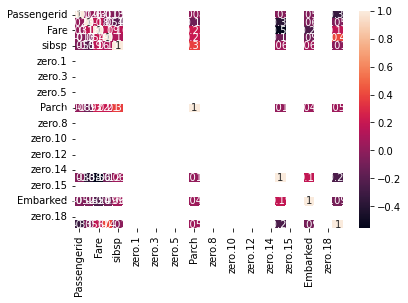

In [ ]:
# Plot HEATMAP
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Seggreggating the Data into X & Y
x=data.drop(['2urvived','Embarked','Passengerid'],axis=1)
y=data['2urvived']
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1309, dtype: int64

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(1047, 25)

In [ ]:
# Building & Fitting Model
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.1)
dsc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.1)

In [ ]:
# Preding using Trained Model
y_pred=dsc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Evaluating the Model
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test, y_pred))

Accuracy : 0.7213740458015268


[Text(0.5, 0.5, 'gini = 0.382\nsamples = 1047\nvalue = [778, 269]')]

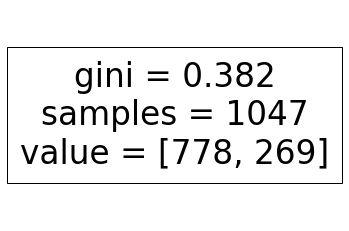

In [ ]:
# Plotting
from sklearn.tree import plot_tree
plot_tree(dsc,max_depth=5, feature_names=None, class_names=None, label='all', filled=False, impurity=True)

###**2-MultiClass**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [3]:
!kaggle datasets download -d yasserh/wine-quality-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 2.60MB/s]
Archive:  wine-quality-dataset.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WineQT.csv              


In [4]:
data=pd.read_csv('WineQT.csv')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

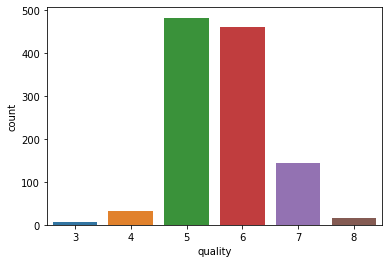

In [5]:
# Countplot
sns.countplot(x=data['quality'], data=data)

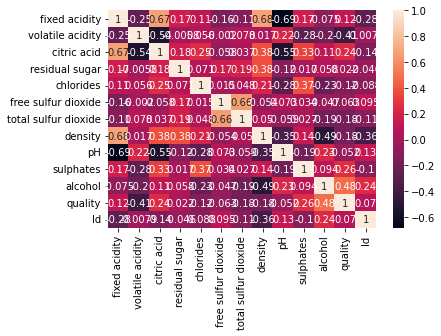

In [6]:
# Plot HEATMAP
sns.heatmap(data.corr(),annot=True)

In [7]:
# Segreggating X & Y
x=data.drop(['quality','Id'],axis=1)
y=data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape

(800, 11)

In [9]:
# Building & Fitting the Model
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.5)
dsc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.5)

In [10]:
# Predicting using the Trained Model
y_pred=dsc.predict(x_test)
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [11]:
# Evaluating the Model
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test, y_pred))

Accuracy : 0.41690962099125367


[Text(0.5, 0.5, 'gini = 0.646\nsamples = 800\nvalue = [6, 24, 340, 316, 102, 12]')]

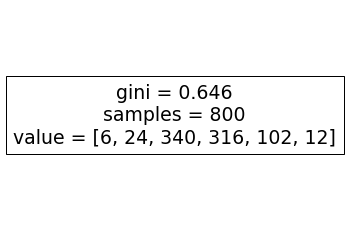

In [12]:
# Plotting
from sklearn.tree import plot_tree
plot_tree(dsc,max_depth=5, feature_names=None, class_names=None, label='all', filled=False, impurity=True)